# Titanic Project

## Description:
In this project, I explore a variety of classifiers for a classic prediction problem: Surviving the Titanic. Using libraries like Pandas, Seaborn, and Numpy, I ran regressions and other methods of classification to see how well I could predict the survival of a passenger on the titantic.
<br>
This project was a great time and a fun look into data visualization, exploration, and many other fundamentals of data science and thus felt like a great refresher project.


## Outline:
Importing Libraries
<br>
Data At an Introductory Glance
<br>
Categorical vs Numerical Data
<br>
Distributions: Original vs Survival
<br>
Logistic Regression Classifier
<br>
More to come??

In [159]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
%matplotlib inline

In [160]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [161]:
#Running introductory functions to understand data better
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [162]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Here, amongst other interesting oberservations, we can see that age seems to be missing for a few passengers
### We can also see that about 38% of passengers seemed have survived, based on the mean value for 'Survived'

In [163]:
numer_vals = train[['Age','SibSp','Parch','Fare']]
cat_vals = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]
survived_train = train[train['Survived'] == 1]
numer_surv = survived_train[['Age','SibSp','Parch','Fare']]
cat_surv = survived_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [164]:
#a better way to see null counts (or rather, non-null counts)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


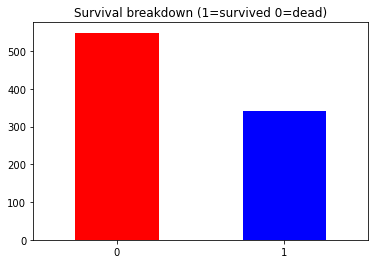

In [165]:
train.Survived.value_counts().plot(kind='bar',color= ['red','blue'])
plt.title("Survival breakdown (1=survived 0=dead)")
plt.xticks(rotation=0)
plt.show()

Text(0.5, 1.0, 'Survival Breakdown')

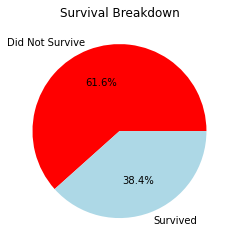

In [166]:
my_labels = 'Did Not Survive','Survived'
my_colors = ['red','lightblue']
plt.pie(train.Survived.value_counts(), labels=my_labels, explode = None,colors=my_colors, autopct='%1.1f%%')
plt.title('Survival Breakdown')

#### The charts above allow us to confirm our observation of the survival rate. 

## In order to continue exploring the data, let's separate categorical and numerical:

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


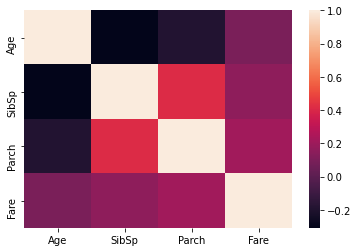

In [167]:
#Identifying Correlation
sea.heatmap(numer_vals.corr())
print(numer_vals.corr())

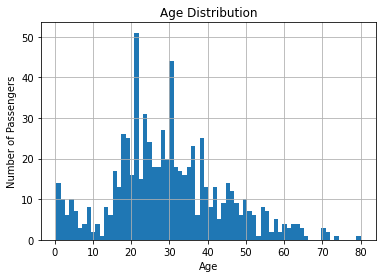

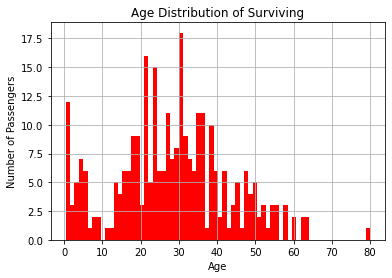

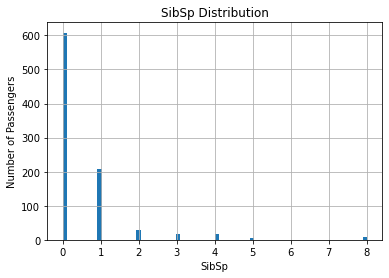

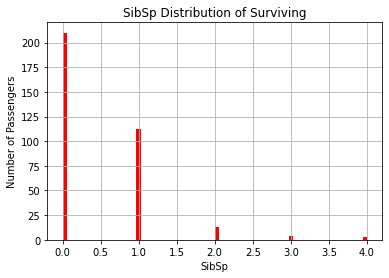

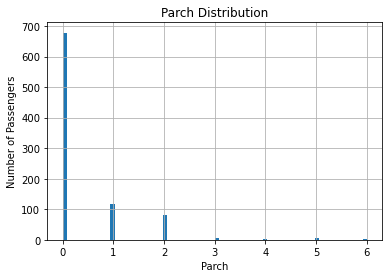

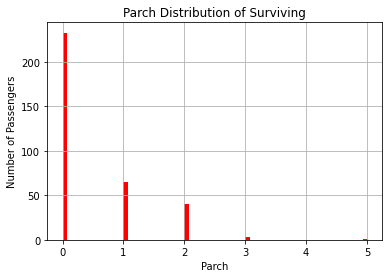

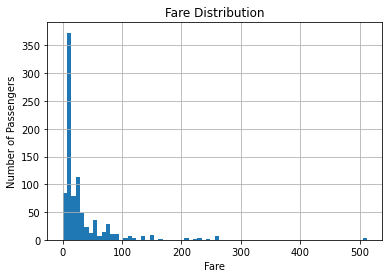

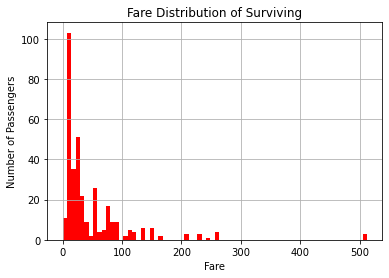

In [168]:
#Looking at Initial Numerical Distributions vs Survived Numerical Distributions

for i in numer_vals:
    train[i].hist(bins=70)
    plt.title(i + ' Distribution')
    plt.xlabel(i)
    plt.ylabel('Number of Passengers')
    plt.show()
    survived_train[i].hist(bins=70, color = 'red')
    plt.title(i + ' Distribution of Surviving')
    plt.xlabel(i)
    plt.ylabel('Number of Passengers')
    plt.show()


### What do these tables tell us??
#### Age Distribution:
All:
We can see quite clearly that most passengers were quite young, and that there were very few passengers 70 or older. The most common age seems to be 22, with the second most common being 31.

#### Sibsp Distribution:
This is the distribution of siblings and spouses of a passenger. It is clear here that most people here were single and alone, with over 600 of the 891 passengers having 0 siblings or spouses. This is something we will look at again in the 'Parch' category. Interestingly, however, there were more people with 8 siblings + spouses than 5 (both non-zero). This is as each sibling is their own passenger and would likely also have 8 sib/sp.
#### Parch Distribution:
This is the distribution of parents and children of a passenger. Again, the large majority don't have a parent or child on board. This may tell us something about the type of people who boarded the titanic, but we'll leave that to a behavioral expert for now...
#### Fare Distribution:
Lastly, we can see here that most passengers paid around 10 dollars as a fare, but we can also observe here that at least one rich fella splurged with a ticket over 500 dollars.

It's important to note for that (excluding age) these distributions are largely not normal distributions.

#### Original Distributions vs Survived:
There doesn't seem to be anything visually significant between those who survived and the overall distribution. The only one that is stastically significant is the age distribution, we'll keep this in mind for later predictions.

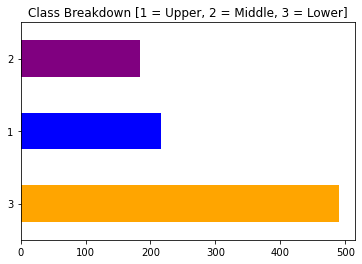

In [169]:
#Looking at Categorical Distributions
train.Pclass.value_counts().plot(kind='barh', color = ['orange', 'blue', 'purple'])
plt.title("Class Breakdown [1 = Upper, 2 = Middle, 3 = Lower]")
plt.show()

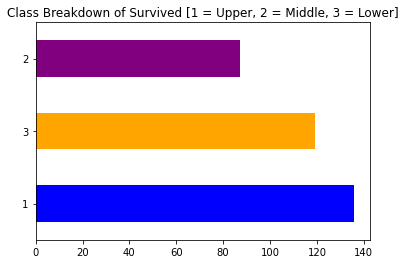

In [170]:
#Looking at Categorical Distributions Survived
survived_train.Pclass.value_counts().plot(kind='barh', color = [ 'blue', 'orange', 'purple'])
plt.title("Class Breakdown of Survived [1 = Upper, 2 = Middle, 3 = Lower]")
plt.show()

#### Class Distribution:
Here we can see a clear affect on survival due to socioeconomic status. This is (quite unfortunately) something to consider when extracting features later on.

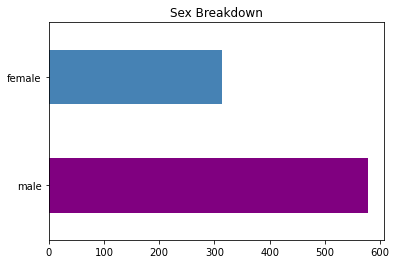

In [171]:
train.Sex.value_counts().plot(kind='barh',color=['purple','steelblue'])
plt.title("Sex Breakdown")
plt.show()


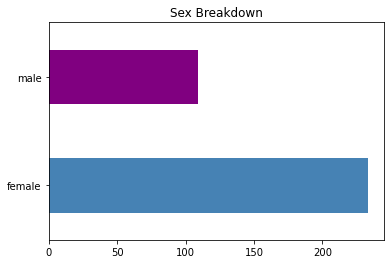

In [172]:
survived_train.Sex.value_counts().plot(kind='barh',color=['steelblue','purple'])
plt.title("Sex Breakdown")
plt.show()

#### Class Distribution:
Orignially, there were about twice as many males as there were females on the ship. At the end, there were *more than twice* as many women, meaning **women were roughly four times more likely to survive.**



## Classifier 1: Logisitic Regression
Now that we have identified 3 statistically significant factors, let's attempt to create a model that we can use to predict whether or not passenger survived using these 3 categories (Age, Sex, and Class) as our features for logistic regression.

In [173]:
#making our 3 main columns feature-friendly
train['Sex']=train['Sex'].apply(lambda sex:1 if sex=='male' else 0) #quantifying category
train['Age']=train['Age'].fillna(train['Age'].mean()) #to avoid data issues, note this does dampen our classifier a little


test['Sex']=test['Sex'].apply(lambda sex:1 if sex=='male' else 0) #quantifying category
test['Age']=test['Age'].fillna(train['Age'].mean()) #to avoid data issues, note this does dampen our classifier a little
test['Fare']=test['Fare'].fillna(train['Fare'].mean()) #again. this dampens the classifier by making the data more uniformm


In [174]:
from sklearn.linear_model import LogisticRegression


In [175]:
reg = LogisticRegression()


In [176]:
model.fit(train[["Pclass","Sex","Age"]].values,train['Survived'].values)

LogisticRegression()

In [177]:
predict = model.predict(test[["Pclass","Sex","Age"]])

In [178]:

data = {'PassengerId':test['PassengerId'],
        'Survived': predict}
 
# Create DataFrame
df = pd.DataFrame(data)
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [179]:
df.to_csv('predictions.csv', index=False)


### INITIAL SCORE: 73% ACCURATE